In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [3]:
cocacola=pd.read_excel('C:\\Users\\vikra\\OneDrive\\Desktop\\Data scince assignment\\Assignment\\Forcasting\\CocaCola_Sales_Rawdata.xlsx')
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
cocacola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [5]:
cocacola.dtypes

Quarter     object
Sales      float64
dtype: object

In [6]:
cocacola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

<AxesSubplot:>

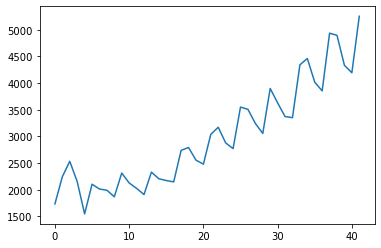

In [7]:
cocacola.Sales.plot()

<AxesSubplot:>

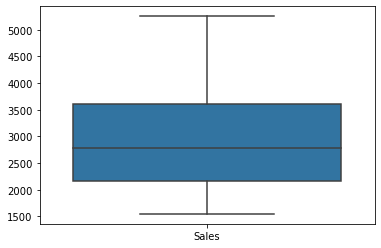

In [8]:
sns.boxplot (data=cocacola)

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

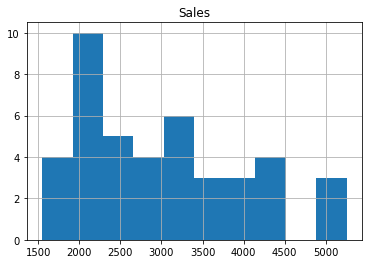

In [9]:
cocacola.hist()

<AxesSubplot:ylabel='Density'>

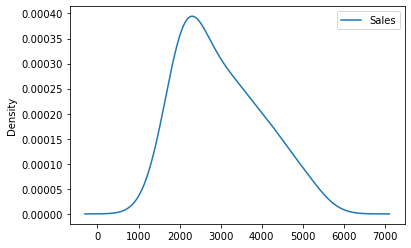

In [10]:
cocacola.plot(kind="kde")

<AxesSubplot:xlabel='Sales', ylabel='Density'>

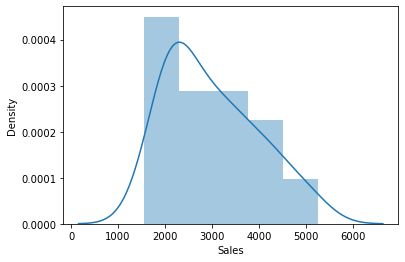

In [11]:
sns.distplot(cocacola['Sales'],kde=True)

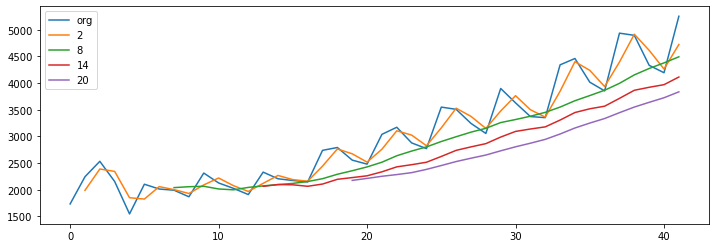

In [12]:
plt.figure(figsize=(12,4))
cocacola.Sales.plot(label="org")
for i in range(2,24,6):
    cocacola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

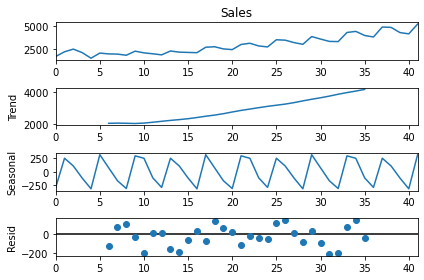

In [13]:
decompose_ts_add = seasonal_decompose(cocacola.Sales,period=12)
decompose_ts_add.plot()
plt.show()

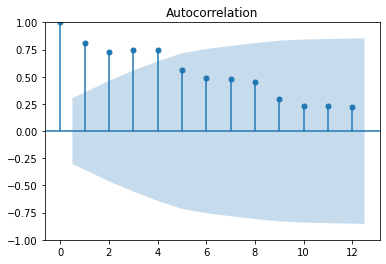

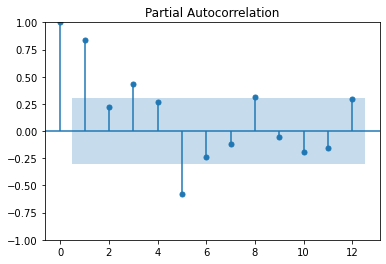

In [14]:
#ACF plots and PACF plots

import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cocacola.Sales,lags=12)
tsa_plots.plot_pacf(cocacola.Sales,lags=12)
plt.show()

In [15]:
cocacola['quarter'] = 0
for i in range(42):
    p=cocacola['Quarter'][i]
    cocacola['quarter'][i]=p[0:2]

In [16]:
cocacola

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [17]:
cocacola.quarter.value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [18]:
df_dummies=pd.DataFrame(pd.get_dummies(cocacola['quarter']),columns=['Q1','Q2','Q3','Q4'])
cocacola1=pd.concat([cocacola,df_dummies],axis= 1)

In [19]:
cocacola1.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [20]:
cocacola1['t'] = np.arange(1,43)
cocacola1['t_squared'] = cocacola1['t']**2
cocacola1["Sales_log"] =np.log(cocacola['Sales'])

In [21]:
cocacola1.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [22]:
Train =cocacola1.head(32)
Test =cocacola1.tail(10)

In [23]:
# linear model
import statsmodels.formula.api as smf

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767121

In [24]:
#Exponential

Exp=smf.ols('Sales_log~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

590.3316432076657

In [25]:
#Quadratic

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.7357355407437

In [26]:
#Additive Seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.4665461858358

In [27]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_Quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_add_sea_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_Quad))**2))
rmse_add_sea_Quad

277.3510771128639

In [28]:
#Multiplicative Seasonality

mul_sea = smf.ols('Sales_log~Q1+Q2+Q3+Q4',data=Train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_mul_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

1908.250394836118

In [29]:
#Multiplicative Additive Seasonality

mul_sea_Quad = smf.ols('Sales_log~t+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mul_sea_Quad = pd.Series(mul_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t']]))
rmse_mul_sea_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_mul_sea_Quad)))**2))
rmse_mul_sea_Quad

448.8678182692097

In [30]:
#compare the results 

data = {"model":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea",'rmse_add_sea_Quad','rmse_mul_sea','rmse_mul_sea_Quad']),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_Quad,rmse_mul_sea,rmse_mul_sea_Quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,model,RMSE_Values
4,rmse_add_sea_Quad,277.351077
6,rmse_mul_sea_Quad,448.867818
2,rmse_Quad,457.735736
1,rmse_Exp,590.331643
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
5,rmse_mul_sea,1908.250395


In [31]:
#Build the model on entire data set

In [32]:
Final_add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=cocacola1).fit()

In [33]:
Final_pred_add_sea_Quad = pd.Series(Final_add_sea_Quad.predict(cocacola1[['Q1','Q2','Q3','Q4','t','t_squared']]))
Final_rmse_add_sea_Quad = np.sqrt(np.mean((np.array(cocacola1['Sales'])-np.array(Final_pred_add_sea_Quad))**2))
Final_rmse_add_sea_Quad

159.05522576522475

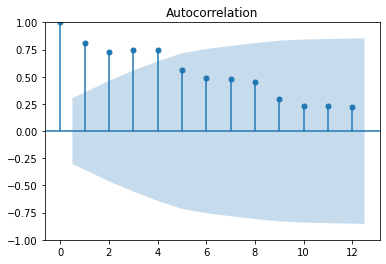

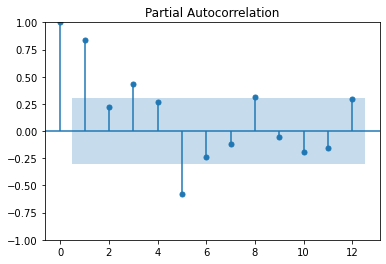

In [34]:
#ACF plots and PACF plots

import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cocacola.Sales,lags=12)
tsa_plots.plot_pacf(cocacola.Sales,lags=12)
plt.show()

In [35]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [36]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

22.724051812293908

In [37]:
#Holt method

hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

16.720651186614823

In [38]:
#Holts winter exponential smoothing with additive seasonality and additive trend

hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

12.18419752082701

In [39]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend

hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

12.781002162867637

In [40]:
### Final Model by combining train and test

hwe_model_add_add = ExponentialSmoothing(cocacola1["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [41]:
hwe_model_add_add.forecast(10)

42    5055.537501
43    4927.723652
44    4883.395386
45    5555.315269
46    5589.336941
47    5335.210947
48    5233.944437
49    5969.869343
50    6031.388558
51    5756.189471
dtype: float64

In [42]:
#Building Time series forcasting with ARIMA

In [43]:
X = cocacola1['Sales'].values

In [44]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

In [45]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Mon, 29 Aug 2022   AIC                            360.163
Time:                        12:42:32   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

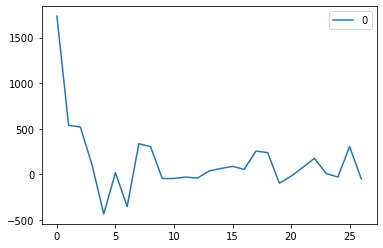

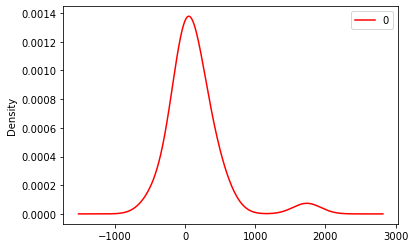

                 0
count    27.000000
mean    137.791854
std     385.970461
min    -433.659591
25%     -34.938854
50%      55.067397
75%     247.080156
max    1734.827000


In [46]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde',color='red')
pyplot.show()
print(residuals.describe())

In [47]:
# rolling Forecast ARIMA Model

In [48]:
history = [x for x in train]

In [49]:
predictions = list()

In [50]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3130.132554, expected=3243.859993
predicted=3167.315970, expected=3056.000000
predicted=3717.472606, expected=3899.000000
predicted=3775.837487, expected=3629.000000
predicted=3332.748124, expected=3373.000000
predicted=3258.606785, expected=3352.000000
predicted=4081.006043, expected=4342.000000
predicted=3955.785222, expected=4461.000000
predicted=4146.277710, expected=4017.000000
predicted=3958.435702, expected=3854.000000
predicted=4701.652912, expected=4936.000000
predicted=4990.071110, expected=4895.000000
predicted=4390.352785, expected=4333.000000
predicted=4190.872455, expected=4194.000000
predicted=5176.975238, expected=5253.000000


In [51]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 34279.763


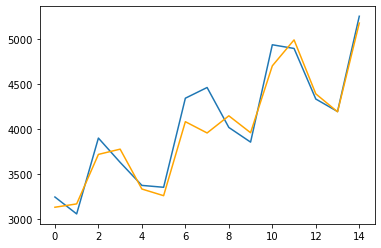

In [52]:
pyplot.plot(test)
pyplot.plot(predictions, color='orange')
pyplot.show()